### NeoPixels

Welcome to the notebook with examples how to use the 8 neopixel strip. You will need the same drivers as for the single neopixel used before. Remove the wires from the single neopixel of the Lego spectrometer. Connect them to the strip. Note the new strip has two GND connectors, pick either one.

In [ ]:
import time
import board
import busio
from rainbowio import colorwheel
from adafruit_seesaw import seesaw, neopixel

i2c_bus = busio.I2C(board.SCL, board.SDA)
ss = seesaw.Seesaw(i2c_bus)

The only difference to before is that we set `NEOPIXEL_NUM` to 8.

In [ ]:
NEOPIXEL_PIN = 9  # change to Pin NeoPixel is connected to (9, 10, 11, 14, 15, 24, or 25 )
NEOPIXEL_NUM = 8  # we have 8 neopixels now.

pixels = neopixel.NeoPixel(ss, NEOPIXEL_PIN, NEOPIXEL_NUM)

The command `pixels.fill` to light up all 8 neopixels with the specified color. Same command we used for the single neopixel.

In [ ]:
pixels.brightness = 0.6
pixels.fill((0,200,255)) # Note this is Red, Green, Blue from 0 to 255

In [ ]:
pixels.fill((0,0,0)) # Off

## Addressing each neopixel individually

You can set the color of only one neopixel using  `pixels[0] = (255,0,0)`. Here the first neopixel will be set to red. Note that the other neopixels to not change when you issue the command. USe the cell below and male every neopixel a different color 🌈. 

In [ ]:
pixels[0] = (255,255,0)   # Pixel 1 to yellow
pixels[1] = (255,0,0)     # Pixel 2 to red

# Add/change your code here

In [ ]:
pixels.fill((0,0,0)) # Off

If you look closely, you will see that the neopixels do not turn on at the same time. This is because by default each time a pixel value is set, the neopixels are updated. Sometimes you want neopixels to turn on at the same time. You can set `pixels.auto_write` to `True` for auto updates (the default) or `False` to not immediately update the neopixels. In that case you must use `pixels.show()` to update the neopixels. Here is an example.

First run the cell below and you might see a small delay between the prior neopixel turning off and the new one turning on in the loop.

In [ ]:
pixels.fill((0,0,0))  # All off

for p in range(NEOPIXEL_NUM):
    if(p>0):
        pixels[p-1] = (0,0,0)
    pixels[p] = (100,0,0)
    time.sleep(0.05)
    
pixels.fill((0,0,0))  # All off

Next we do the same thing, but with `pixels.auto_write = False` and `pixels.show()`. See if you can spot the difference.

In [ ]:
pixels.fill((0,0,0))  # All off
pixels.auto_write = False

for p in range(NEOPIXEL_NUM):
    if(p>0):
        pixels[p-1] = (0,0,0)
    pixels[p] = (100,0,0)
    pixels.show()
    time.sleep(0.05)

pixels.auto_write = True
pixels.fill((0,0,0))  # All off

### Fancier pattern

Change the list `pattern` and the argument in `time.sleep` to make fancy patterns. When you stop the cell, the `KeyboardInterrupt` part is executed.

In [ ]:
# Here we make two patterns, each having eight colors for the eight neopixels

pattern = [[(255,  0,  0),(  0,255,  0),(255,  0,  0),(  0,255,  0),(255,  0,  0),(  0,255,  0),(255,  0,  0),(  0,255,  0)],
           [(  0,255,  0),(255,  0,  0),(  0,255,  0),(255,  0,  0),(  0,255,  0),(255,  0,  0),(  0,255,  0),(255,  0,  0)]]

pixels.auto_write = False
try:
    while True:
        for i, p in enumerate(pattern):
            for j in range(NEOPIXEL_NUM):
                pixels[j] = p[j]
            pixels.show()
            time.sleep(0.1)
                
except KeyboardInterrupt:
    pixels.auto_write = True
    pixels.fill((0,0,0))
    print('Aborted')

### HSV color space

So far we have desribed our colors in terms of red, green and blue. But colors can be represented by difference values and a popular way is to express colors in terms of hue, saturation and value, or HSV. Here is a diagram
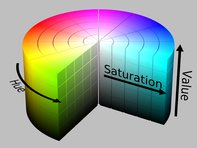

One nice feature is that you can loop through all colors by changiong the hue value from 0 to 1. To make this easier, we will use `import colorsys` which adds routines to convert colors between color spaces. 

In [ ]:
import colorsys as col

Single rainbow.

In [ ]:
saturation = 1.0
value = 0.5

for p in range(NEOPIXEL_NUM):
    hue = (1. / NEOPIXEL_NUM) * p
    rgb = col.hsv_to_rgb(hue, saturation, value)  # Comes back as (0..1, 0..1, 0..1) color
    pixels[p] = tuple([int(255*v) for v in rgb])  # This multiplies each by 255 and makes an integer

Looping through hue values.

In [ ]:
# Moving the rainbow colors along

saturation = 1.0
value = 0.5
offset = 0.0

pixels.auto_write = False

try:
    while True:
        for p in range(NEOPIXEL_NUM):
            hue = offset + (1. / NEOPIXEL_NUM) * p
            rgb = col.hsv_to_rgb(hue, saturation, value)  # Comes back as (0..1, 0..1, 0..1) color
            pixels[p] = tuple([int(255*v) for v in rgb])  # This multiplies each by 255 and makes an integer

        pixels.show()              # Because auto writing is off
        offset = offset + 0.125    # Because we have 8 neopixels, we add 1/8 = 0.125
        time.sleep(0.01)
    
except KeyboardInterrupt:
    pixels.auto_write = True
    pixels.fill((0,0,0))
    print('Aborted')